# Radial Sonification of Images

The code converts an image into a sound file using a radial mapping technique. Each pixel's color values influence the frequency of sine waves, and these sine waves are combined to create a sound representation of the image.

In [20]:
import numpy as np
from PIL import Image
from scipy.io.wavfile import write
import matplotlib.pyplot as plt


def generate_sine_wave(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * frequency * t)
    return wave

def image_to_sound_radial_sine(image_path, output_path, sample_rate=44100, duration=5):
    image = Image.open(image_path).convert("RGB")
    #rotated_image = image.rotate(90, expand=True) 
    #image_array = np.array(rotated_image)
    image_array = np.array(image)
    plt.imshow(image)
   # plt.imshow(rotated_image)
    plt.title('Original Image')
    plt.show()
    
    height, width, _ = image_array.shape
    total_samples = sample_rate * duration
    sound_data = np.zeros(total_samples)

    min_freq, max_freq = 200, 2000

    center_x, center_y = width // 2, height // 2
    y, x = np.indices((height, width))
    distances = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    max_radius = np.sqrt(center_x**2 + center_y**2)
    distances = (distances / max_radius) * (total_samples // 2)
    
    plt.imshow(distances, cmap='viridis')
    plt.colorbar()
    plt.title('Radial Distance Map')
    plt.show()

    num_rings = total_samples // (sample_rate * duration // 2)
    ring_duration = total_samples // num_rings

    for r in range(num_rings):
        mask = (distances >= r * max_radius / num_rings) & (distances < (r + 1) * max_radius / num_rings)
        ring_pixels = image_array[mask]
        
        if len(ring_pixels) == 0:
            continue
        
        red_mean = np.mean(ring_pixels[:, 0]) / 255.0
        green_mean = np.mean(ring_pixels[:, 1]) / 255.0
        blue_mean = np.mean(ring_pixels[:, 2]) / 255.0
        
        red_freq = min_freq + red_mean * (max_freq - min_freq)
        green_freq = min_freq + green_mean * (max_freq - min_freq)
        blue_freq = min_freq + blue_mean * (max_freq - min_freq)

        red_wave = generate_sine_wave(red_freq, ring_duration / sample_rate, sample_rate)
        green_wave = generate_sine_wave(green_freq, ring_duration / sample_rate, sample_rate)
        blue_wave = generate_sine_wave(blue_freq, ring_duration / sample_rate, sample_rate)
        
        wave = (red_wave + green_wave + blue_wave) / 3.0
        
        start_index = r * ring_duration
        end_index = start_index + ring_duration
        sample_length = min(len(wave), end_index - start_index)
        sound_data[start_index:end_index] += wave[:sample_length]

    sound_data = sound_data / np.max(np.abs(sound_data))
    sound_data = (sound_data * 32767).astype(np.int16)
    write(output_path, sample_rate, sound_data)



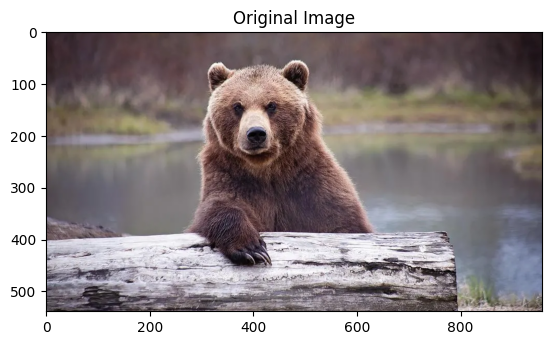

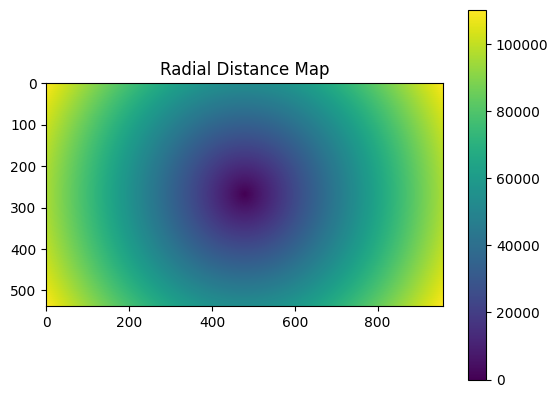

In [21]:
jpeg_file = 'bear.webp'
wav_file = 'image_sonification_radial_sine-bear.wav'
image_to_sound_radial_sine(jpeg_file, wav_file)

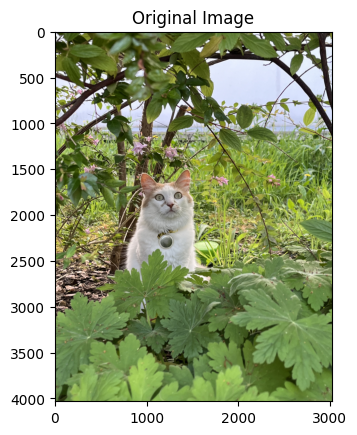

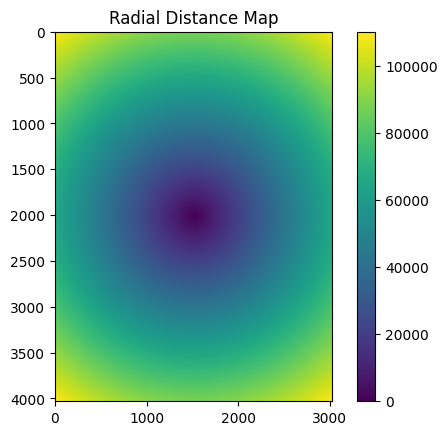

In [17]:
jpeg_file = 'IMG_6098.jpeg'
#jpeg_file = 'Funny_Dog_H.webp'
wav_file = 'image_sonification_radial_sine-cat.wav'
image_to_sound_radial_sine(jpeg_file, wav_file)